## Importation des packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import scipy.stats as st
from collections import Counter
from scipy.stats import t, shapiro
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Importation des données

In [2]:
df = pd.DataFrame(pd.read_csv("dataframe7.csv"))
df

,country,Pays,gdpppp,y_child,indice_gini,coeff_elas,c_i_parents,mj,ln_y_child,ln_mj
0,ALB,Albanie,7297.0,728.89795,30.0,0.815874,1,2994.829902,6.591534,8.004643
1,ALB,Albanie,7297.0,728.89795,30.0,0.815874,1,2994.829902,6.591534,8.004643
2,ALB,Albanie,7297.0,728.89795,30.0,0.815874,1,2994.829902,6.591534,8.004643
3,ALB,Albanie,7297.0,728.89795,30.0,0.815874,1,2994.829902,6.591534,8.004643
4,ALB,Albanie,7297.0,728.89795,30.0,0.815874,1,2994.829902,6.591534,8.004643
...,...,...,...,...,...,...,...,...,...,...
5699995,ZAF,Afrique du Sud,9602.0,82408.55000,63.0,0.677000,100,5617.904880,11.319444,8.633714
5699996,ZAF,Afrique du Sud,9602.0,82408.55000,63.0,0.677000,100,5617.904880,11.319444,8.633714
5699997,ZAF,Afrique du Sud,9602.0,82408.55000,63.0,0.677000,100,5617.904880,11.319444,8.633714
5699998,ZAF,Afrique du Sud,9602.0,82408.55000,63.0,0.677000,100,5617.904880,11.319444,8.633714


## Mission04

On veut expliquer le revenu d’un individus  en fonction de plusieur variable explicatives, dans un premier temps on utilise comme variable explicative le pays de l’individus donc il s’agit d’étudier l’impact d’une variable qualitative sur une variable quantitative c’est pour ça on utilise l ANOVA

In [3]:
df_1=df.groupby(by=['Pays','country','gdpppp','y_child','indice_gini','coeff_elas','mj','ln_y_child','ln_mj']).mean().reset_index()
df_1 #on groupe juste pour gagner du temps

,Pays,country,gdpppp,y_child,indice_gini,coeff_elas,mj,ln_y_child,ln_mj,c_i_parents
0,Afrique du Sud,ZAF,9602.0,60.490383,63.0,0.677000,5617.904880,4.102484,8.633714,13.616
1,Afrique du Sud,ZAF,9602.0,138.341550,63.0,0.677000,5617.904880,4.929726,8.633714,17.416
2,Afrique du Sud,ZAF,9602.0,192.294500,63.0,0.677000,5617.904880,5.259028,8.633714,19.642
3,Afrique du Sud,ZAF,9602.0,236.994000,63.0,0.677000,5617.904880,5.468035,8.633714,22.442
4,Afrique du Sud,ZAF,9602.0,279.367580,63.0,0.677000,5617.904880,5.632528,8.633714,25.566
...,...,...,...,...,...,...,...,...,...,...
11395,États-Unis,USA,43261.0,69926.370000,40.8,0.537666,25503.581661,11.155198,10.146574,72.434
11396,États-Unis,USA,43261.0,77634.820000,40.8,0.537666,25503.581661,11.259771,10.146574,75.656
11397,États-Unis,USA,43261.0,88482.840000,40.8,0.537666,25503.581661,11.390564,10.146574,75.170
11398,États-Unis,USA,43261.0,106765.260000,40.8,0.537666,25503.581661,11.578388,10.146574,78.198


On trace le graphique boites à moustaches des revnus par les pays qu'on a sélectionné

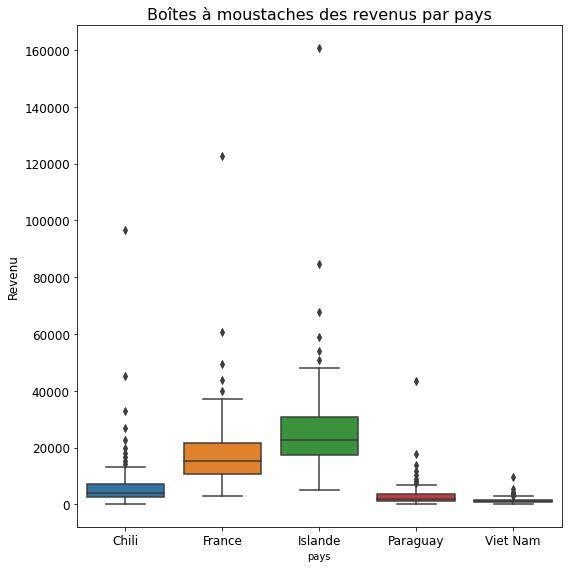

In [4]:
df_11 = df_1.loc[(df_1['Pays'] == 'Islande') |(df_1['Pays'] == 'France')  | (df_1['Pays'] == 'Chili') |
                           (df_1['Pays'] == 'Paraguay')|(df_1['Pays'] == 'Viet Nam')]
plt.figure(figsize=(8,8))

ax = sns.boxplot(x='Pays', y='y_child', data=df_11)

plt.ylabel('Revenu', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('pays')
plt.xticks(fontsize=12)
plt.title("Boîtes à moustaches des revenus par pays", fontsize=16)
plt.tight_layout()
plt.savefig("Boîtes à moustaches des revenus par pays.png")


on voit qu’il y a une différence dans la distribution des revenus par pays  donc le pays a un impact sur le revenu de l’individu

On confirme ça avec l'ANOVA

In [5]:
#H0: Le pays n'a pas d'influence sur le revenu enfant moyen
anova_pays = smf.ols('y_child~Pays', data=df_1).fit(alpha=0.05)
table=sm.stats.anova_lm(anova_pays,typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
Pays,113.0,5.057486e+11,4.475651e+09,97.618882,0.0
Residual,11286.0,5.174430e+11,4.584821e+07,NaN,NaN


In [6]:
m = 114
ddl1=(m - 1)
SCE = table.iloc[0,1] #somme des carrés expliquée
CME = SCE / ddl1  # les carrés moyens exliqués
ddl1, SCE, CME

(113, 505748617375.83435, 4475651481.202074)

In [7]:
n = 11400
ddl2=(n-m)
SCR = table.iloc[1,1] # somme des carrés résiduelle
CMR = SCR / ddl2    # les carrés moyens résiduelle
ddl2, SCR, CMR

(11286, 517442951724.677, 45848214.754977584)

In [8]:
stat_f=CME/CMR# statistique de fisher
stat_f

97.61888232989853

In [9]:
# Coefficient de détermination
R_sq=SCE/(SCE+SCR)
R_sq # la vaiance expliquée du pays est:

0.4942853641966953

In [10]:
#coefficient de détermination ajusté
R_ajusté=1-(n/(n-m))*(1-R_sq)
R_ajusté

0.4891771355522174

In [11]:
print(anova_pays.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     97.62
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:05:50   Log-Likelihood:            -1.1667e+05
No. Observations:               11400   AIC:                         2.336e+05
Df Residuals:                   11286   BIC:                         2.344e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

p_value < alpha donc le pays a un effet sur le revenu de l'individu

puis on fait la même chose mais cette fois ci l'income à une échelle logarithmique et  pareil on trace le graphique boîte à moustache pour voir les distributions des revenus en log par pays 

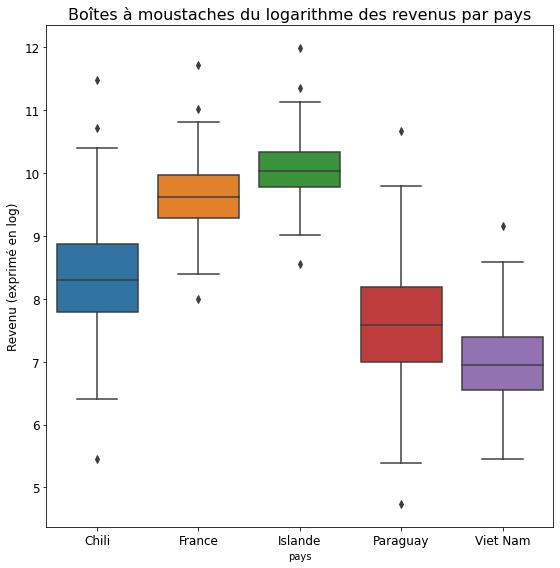

In [12]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='Pays', y='ln_y_child', data=df_11)
plt.ylabel('Revenu (exprimé en log)', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('pays')
plt.xticks(fontsize=12)
plt.title("Boîtes à moustaches du logarithme des revenus par pays", fontsize=16)
plt.tight_layout()
plt.savefig("Boîtes à moustaches du logarithme des revenus par pays.png")

il y a moins des outliers et les variances sont plus égalitaires que le premier modèle.

In [13]:
#H0: Le pays n'a pas d'influence sur le revenu enfant moyen (exprimé en log)
anova_pays1 = smf.ols('ln_y_child~Pays', data=df_1).fit(alpha=0.05)
sm.stats.anova_lm(anova_pays1,typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
Pays,113.0,15891.020388,140.628499,268.015509,0.0
Residual,11286.0,5921.796268,0.524703,NaN,NaN


In [14]:
print(anova_pays1.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     268.0
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:05:51   Log-Likelihood:                -12443.
No. Observations:               11400   AIC:                         2.511e+04
Df Residuals:                   11286   BIC:                         2.595e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

ce modèle est plus performant que l’autre tel que la variance expliquée égale à 72.9%

toujours  pour prédire le revenu de chaque individu, en incluant cette fois ci comme variables explicatives le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu

In [15]:
df_2=df[['y_child','ln_y_child','indice_gini','mj','ln_mj']]


In [16]:
reg = smf.ols('y_child ~ indice_gini + mj', data=df_2).fit(alpha=0.05)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 2.786e+06
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:05:55   Log-Likelihood:            -5.8336e+07
No. Observations:             5700000   AIC:                         1.167e+08
Df Residuals:                 5699997   BIC:                         1.167e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.615e-09     15.287  -2.36e-10      

on a le p value inférieur à alpha donc on peut dire que l’indice de gini et le revenu moyen ont un effet sur  le revenu de l’individu et on a le pourcentage de la variance expliqué par ce modèle égale à 49.4% Ce qui est cohérent avec le R² obtenu avec la variable explicative pays

pour comprendre l’influence de chaque variable explicative on a essayé de décomposer la variance en utilisant la table d’analyse de variance

In [17]:
l=sm.stats.anova_lm(reg,typ=1)
l

,df,sum_sq,mean_sq,F,PR(>F)
indice_gini,1.0,2.995610e+13,2.995610e+13,6.599749e+05,0.0
mj,1.0,2.229182e+14,2.229182e+14,4.911201e+06,0.0
Residual,5699997.0,2.587215e+14,4.538976e+07,NaN,NaN


In [18]:
# Calcul du R² pour les variables indice de gini et le revenu moy 
SCE_ind = l.iloc[0,1]
SCE_mj=l.iloc[1,1]
SCR=l.iloc[2,1]
R_ind=SCE_ind/(SCE_ind+SCE_mj+SCR)
R_mj=SCE_mj/(SCE_mj+SCE_ind+SCR)
R_mj, R_ind  

(0.43573112913749223, 0.05855423505941592)

la variable indice_gini explique 5% de la variance de la variable y_child \
la variable revenu moyen qui explique le plus de la variabilité de revenu de l’individu par 43.5%

In [19]:
reg1 = smf.ols('ln_y_child ~ indice_gini + ln_mj', data=df_2).fit(alpha=0.05)
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 7.606e+06
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:05:59   Log-Likelihood:            -6.2327e+06
No. Observations:             5700000   AIC:                         1.247e+07
Df Residuals:                 5699997   BIC:                         1.247e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4924      0.003    164.410      

avec les revenus en logarithme on a trouvé que le modèle explique 72.7% de la variance de revenu de l’individu donc il est plus performant que l’autre modèle par contre il a presque les mm performances de l’anova du logarithme de revenu. \ 
toutes les variables sont sgnificativement différentes de zéro

In [20]:
l1=sm.stats.anova_lm(reg1,typ=1)
l1

,df,sum_sq,mean_sq,F,PR(>F)
indice_gini,1.0,1.190987e+06,1.190987e+06,2.283594e+06,0.0
ln_mj,1.0,6.742643e+06,6.742643e+06,1.292832e+07,0.0
Residual,5699997.0,2.972779e+06,5.215404e-01,NaN,NaN


In [21]:
# Calcul du R² pour les variables indice de gini et le revenu moy 
SCE_ind = l1.iloc[0,1]
SCE_mj=l1.iloc[1,1]
SCR=l1.iloc[2,1]
R_ind=SCE_ind/(SCE_ind+SCE_mj+SCR)
R_ln_mj=SCE_mj/(SCE_mj+SCE_ind+SCR)
R_ln_mj, R_ind 

(0.6182276379913569, 0.10920062863460257)

la variable revenu moy qui explique  plus la variabilité de revenu de l'individu par 61.8%

pour améliorer notre modèle on  a rajouté la classe de revenu des parents

In [22]:
df_3=df[['Pays','y_child','ln_y_child','indice_gini','mj','ln_mj','c_i_parents']]

In [23]:
reg2 = smf.ols('y_child ~ indice_gini + mj+c_i_parents', data=df_3).fit(alpha=0.05)
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 2.059e+06
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:06:05   Log-Likelihood:            -5.8187e+07
No. Observations:             5700000   AIC:                         1.164e+08
Df Residuals:                 5699996   BIC:                         1.164e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2661.3972     15.649   -170.064      

le modèle monte en performance 

In [24]:
l2=sm.stats.anova_lm(reg2,typ=1)
l2

,df,sum_sq,mean_sq,F,PR(>F)
indice_gini,1.0,2.995610e+13,2.995610e+13,6.954324e+05,0.0
mj,1.0,2.229182e+14,2.229182e+14,5.175057e+06,0.0
c_i_parents,1.0,1.319128e+13,1.319128e+13,3.062361e+05,0.0
Residual,5699996.0,2.455302e+14,4.307550e+07,NaN,NaN


In [25]:
# Calcul du R² pour les variables indice de gini, le revenu moy et la classe de revenus des parents 
SCE_ind = l2.iloc[0,1]
SCE_mj=l2.iloc[1,1]
SCE_cl=l2.iloc[2,1]
SCR=l2.iloc[3,1]
R_ind=SCE_ind/(SCE_ind+SCE_mj+SCE_cl+SCR)
R_mj=SCE_mj/(SCE_ind+SCE_mj+SCE_cl+SCR)
R_cl=SCE_cl/(SCE_ind+SCE_mj+SCE_cl+SCR)
R_mj,R_ind, R_cl

(0.43573112913749695, 0.05855423505941655, 0.025784566912814683)

la variable classe de revenu des parent explique 2.5% de la variance

In [26]:
reg3 = smf.ols('ln_y_child ~ indice_gini + ln_mj+c_i_parents', data=df_3).fit(alpha=0.05)
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 6.837e+06
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:06:11   Log-Likelihood:            -5.5890e+06
No. Observations:             5700000   AIC:                         1.118e+07
Df Residuals:                 5699996   BIC:                         1.118e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0757      0.003    -27.878      

In [27]:
l3=sm.stats.anova_lm(reg3,typ=1)
l3

,df,sum_sq,mean_sq,F,PR(>F)
indice_gini,1.0,1.190987e+06,1.190987e+06,2.862265e+06,0.0
ln_mj,1.0,6.742643e+06,6.742643e+06,1.620440e+07,0.0
c_i_parents,1.0,6.010135e+05,6.010135e+05,1.444399e+06,0.0
Residual,5699996.0,2.371765e+06,4.160994e-01,NaN,NaN


In [28]:
# Calcul du R² pour les variables indice de gini, le revenu moy (log) et la classe de revenus des parents 
SCE_ind = l3.iloc[0,1]
SCE_ln_mj=l3.iloc[1,1]
SCE_cl=l3.iloc[2,1]
SCR=l3.iloc[3,1]
R_ind=SCE_ind/(SCE_ind+SCE_ln_mj+SCE_cl+SCR)
R_ln_mj=SCE_ln_mj/(SCE_ind+SCE_ln_mj+SCE_cl+SCR)
R_cl=SCE_cl/(SCE_ind+SCE_ln_mj+SCE_cl+SCR)
R_ln_mj,R_ind, R_cl

(0.6182276379913639, 0.10920062863460381, 0.055106456022354394)

le meilleur modèle qu’on a testé il explique 78.3% de la variance donc il reste que  21.7% de la variance qui n’est pas expliqué.\
toutes les variables sont significativement différentes de zéro \
la variable classe des revenu des parents explique 5.5% 


 Nous allons ici réaliser les tests à un niveau  𝛼=5 % :

In [29]:
alpha = 0.05

Récupérons  𝑛 , le nombre d'individus de l'échantillon, et  𝑝 , le nombre de variables.

In [30]:
n = df.shape[0]
p = 4

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes.

### Les leviers

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de  2∗𝑝/𝑛 .

In [31]:
seuil_levier = 2*p/n
seuil_levier

1.4035087719298246e-06

In [32]:
df_3['levier'] = reg3.get_influence().hat_matrix_diag
levier=df_3.loc[df_3['levier'] > seuil_levier, :]
print(len(levier))

<ipython-input-32-d4443f0d1b5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['levier'] = reg3.get_influence().hat_matrix_diag


124000


In [33]:
df_4 = df_3.groupby(['Pays', 'mj', 'indice_gini', 'ln_mj']).mean()
df_4.reset_index(inplace=True)

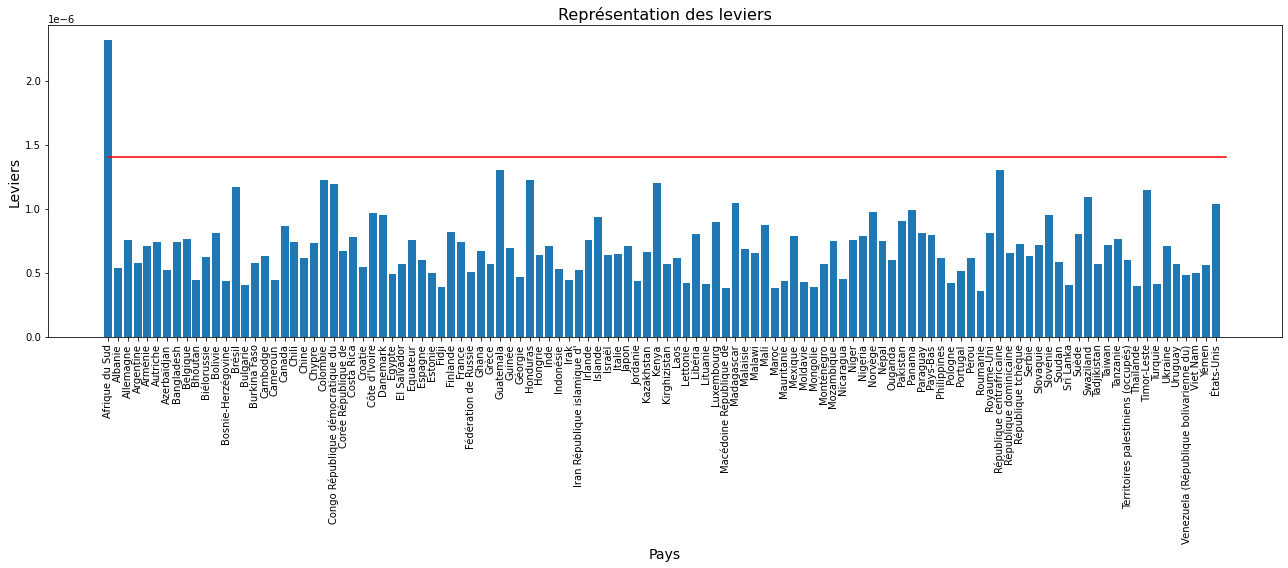

In [34]:
# Représentation des leviers
plt.figure(figsize=(18,8))
plt.bar(df_4['Pays'], df_4['levier'])
plt.xticks(np.arange(0, 114),rotation='vertical')
plt.title('Représentation des leviers', fontsize=16)
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Leviers', fontsize=14)
plt.plot([0, 114], [seuil_levier, seuil_levier], color='r')
plt.tight_layout()
plt.savefig('Représentation des leviers.png')

Pour sélectionner les pays pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [35]:
df_4.loc[df_4['levier'] > seuil_levier, 'Pays']

0    Afrique du Sud
Name: Pays, dtype: object

### Les résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [36]:
df_3['rstudent'] = reg3.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
seuil_rstudent

<ipython-input-36-1c954db0c8b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['rstudent'] = reg3.get_influence().resid_studentized_internal


1.959964400728441

In [37]:
rstudent=df_3.loc[df_3['rstudent'] >abs(seuil_rstudent), :]
print(len(rstudent))


158391


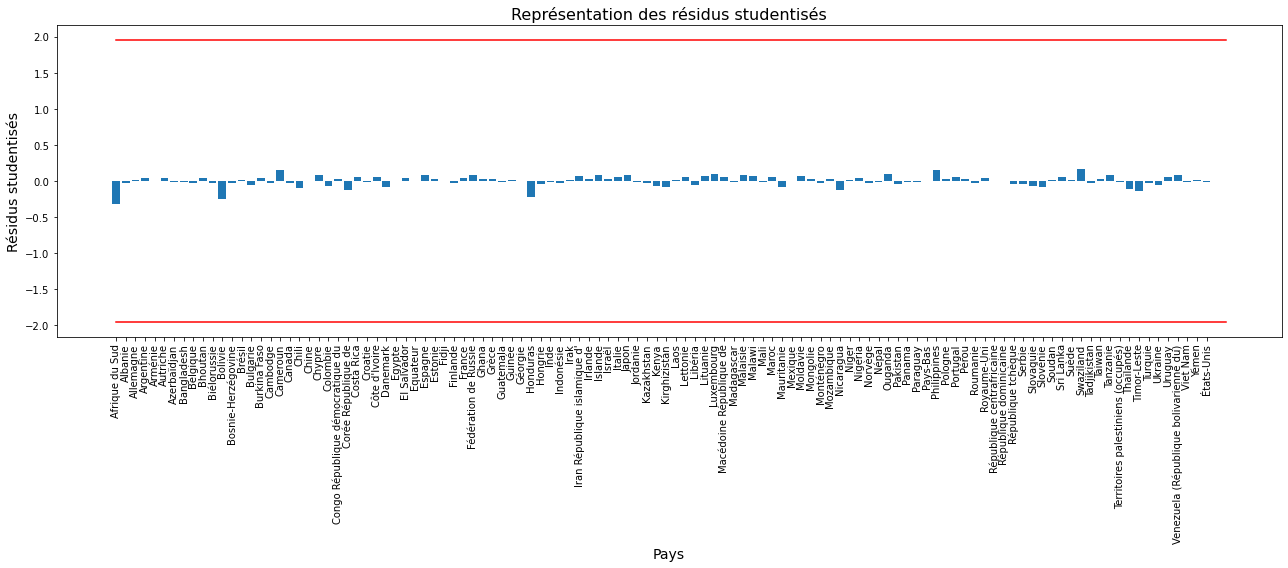

In [38]:
df_5=df_3.groupby(['Pays', 'mj', 'indice_gini', 'ln_mj']).mean()
df_5.reset_index(inplace=True)
plt.figure(figsize=(18,8))
plt.bar(df_5['Pays'], df_5['rstudent'])
plt.xticks(df_5['Pays'],rotation='vertical')
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Résidus studentisés', fontsize=14)
plt.title('Représentation des résidus studentisés', fontsize=16)
plt.plot([0, 115], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 115], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.tight_layout()
plt.savefig('Représentation des résidus studentisés.png')

### La distance de Cook

In [39]:
smf = reg3.get_influence().cooks_distance
df_3['dcooks'] = smf[0]
seuil_dcook = 4/(n-p)
seuil_dcook

7.017548784244761e-07

In [40]:
dcooks=df_3.loc[df_3['dcooks'] > seuil_dcook, :]
print(len(dcooks))

318605


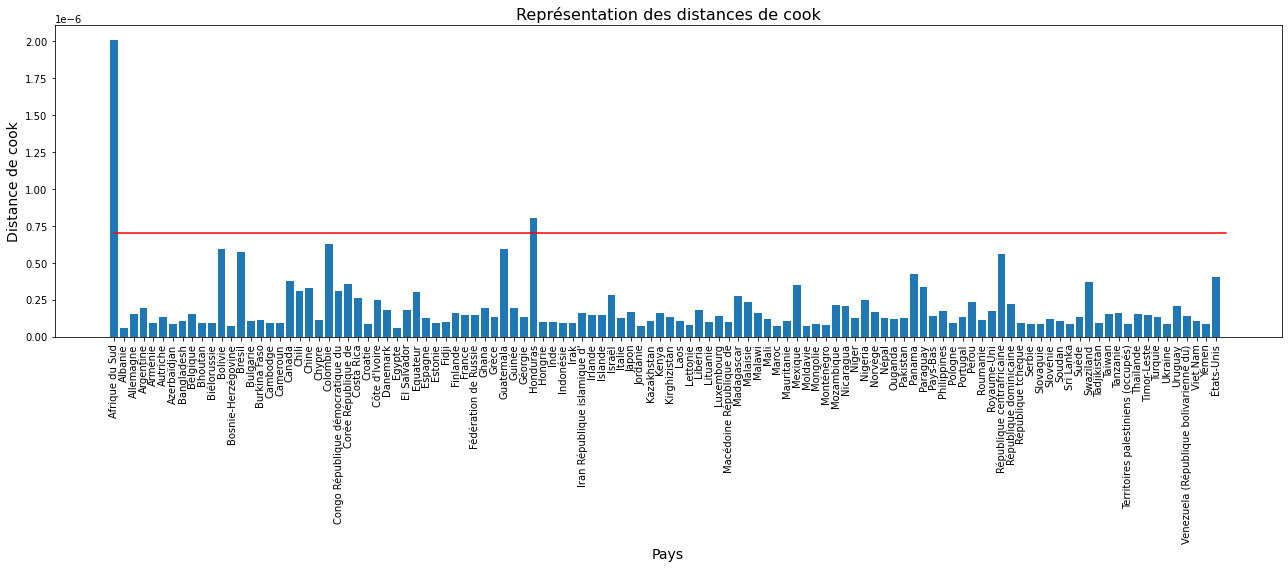

In [41]:
df_6=df_3.groupby(['Pays', 'mj', 'indice_gini', 'ln_mj']).mean()
df_6.reset_index(inplace=True)
plt.figure(figsize=(18,8))
plt.bar(df_6['Pays'], df_6['dcooks'])
plt.xticks(df_6['Pays'],rotation='vertical')
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Distance de cook', fontsize=14)
plt.title('Représentation des distances de cook', fontsize=16)
plt.plot([0, 114], [seuil_dcook, seuil_dcook], color='r')
plt.tight_layout()
plt.savefig('Représentation des distances de cook.png')

### Vérifier la colinéarité des variables

In [42]:
variables = reg3.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0836049121207354, 1.0836049121206635, 0.9999999999999998]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### Tester l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [43]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg3.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


La p-valeur ici est inférieure à 5 %, on rejette l'hypothèse 𝐻0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

### Tester la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk

In [44]:
shapiro(reg3.resid)

C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9747084975242615, pvalue=0.0)

Ici, l'hypothèse de normalité est remise en cause (p-value = 0 < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

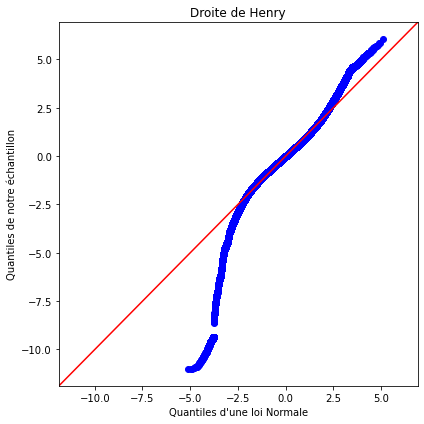

In [45]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(reg3.resid,line='45', fit=True,ax=ax)# la distribution des erreurs n'est pas compatible avec la loi normale (on rejette l'hypothèse de la normalité)
plt.ylabel('Quantiles de notre échantillon', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=10)
plt.xticks(fontsize=10)
plt.title('Droite de Henry', fontsize=12)
plt.tight_layout()
plt.savefig('Droite de Henry.png')


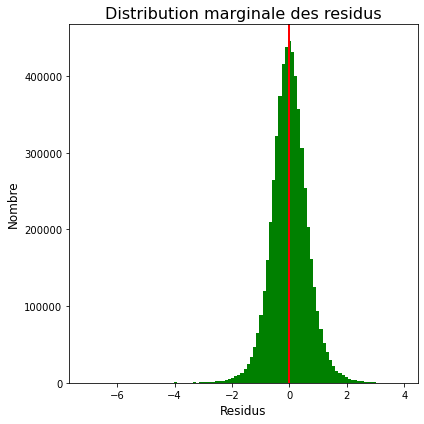

In [46]:
# Préparation des données
X = reg3.resid
Xbar = np.mean(X)
Xsprime = np.std(X)

#Représentation de la distribution marginale
plt.figure(figsize=(6,6))

plt.hist(X, 100, facecolor='g')
plt.axvline(Xbar, color='r', linewidth=2)

plt.title('Distribution marginale des residus', fontsize=16)
plt.ylabel('Nombre',fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('Residus',fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Distribution marginale des residus.png')

les résidus ne sont pas compatibles avec la loi normale

On calcule le nombre de points atypiques et influents

In [47]:
atypique=df_3.loc[(df_3['levier'] > seuil_levier)|(df_3['dcooks'] > seuil_dcook)|(df_3['rstudent'] >abs(seuil_rstudent))]
print(len(atypique))

427798


On supprime ces points

In [48]:
df_3.drop(df_3.loc[(df_3['levier'] > seuil_levier)|(df_3['dcooks'] > seuil_dcook)|(df_3['rstudent'] >abs(seuil_rstudent))].index, inplace=True)

On applique la régression linéaire

In [49]:
import statsmodels.formula.api as smf
reg4 = smf.ols('ln_y_child ~ indice_gini + ln_mj+c_i_parents', data=df_3).fit(alpha=0.05)
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.006e+07
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:07:27   Log-Likelihood:            -3.9443e+06
No. Observations:             5272202   AIC:                         7.889e+06
Df Residuals:                 5272198   BIC:                         7.889e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1451      0.002    -62.209      

le modèle explique 85.1% de la variance toutes les variables sont significativement différents de zéro

en observant juste le coefficient de régression associé à l'indice de gini on peut affirmer que le fait de vivre dans un pays plus inégalitaire (l'indice de gini est élevé ) le revenu d'individus va diminuer car le coefficient est négatif donc plus ça va se défavoriser des personnes.  


On calcul le R² pour les variables indice de gini, le revenu moy (log) et la classe de revenus des parents 

In [54]:
l4=sm.stats.anova_lm(reg4,typ=1)
SCE_ind = l4.iloc[0,1]
SCE_ln_mj=l4.iloc[1,1]
SCE_cl=l4.iloc[2,1]
SCR=l4.iloc[3,1]
R_ind=SCE_ind/(SCE_ind+SCE_ln_mj+SCE_cl+SCR)
R_ln_mj=SCE_ln_mj/(SCE_ind+SCE_ln_mj+SCE_cl+SCR)
R_cl=SCE_cl/(SCE_ind+SCE_ln_mj+SCE_cl+SCR)
R_ln_mj,R_ind, R_cl

(0.6804647949467518, 0.12978217733279546, 0.04108612814010256)

On vérifie la normalité des résidus

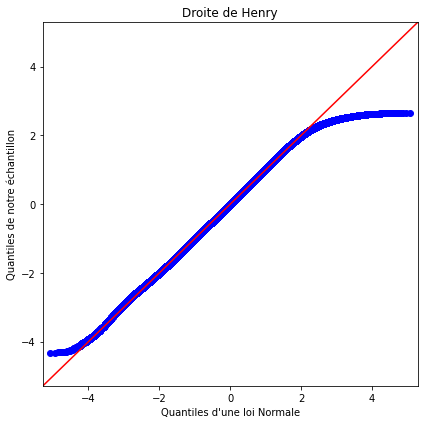

In [50]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(reg4.resid,line='45', fit=True,ax=ax)# la distribution des erreurs n'est pas compatible avec la loi normale (on rejette l'hypothèse de la normalité)
plt.ylabel('Quantiles de notre échantillon', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=10)
plt.xticks(fontsize=10)
plt.title('Droite de Henry', fontsize=12)
plt.tight_layout()
plt.savefig('Droite de Henry2.png')

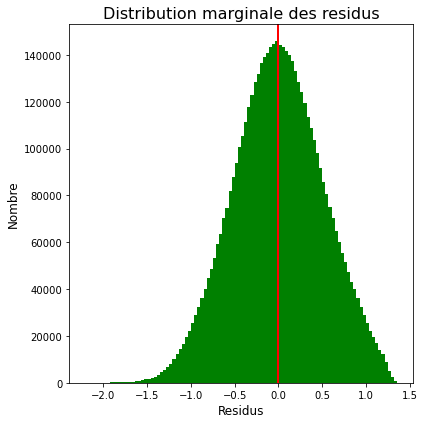

In [51]:
# Préparation des données
X = reg4.resid
Xbar = np.mean(X)
Xsprime = np.std(X)

#Représentation de la distribution marginale
plt.figure(figsize=(6,6))

plt.hist(X, 100, facecolor='g')
plt.axvline(Xbar, color='r', linewidth=2)

plt.title('Distribution marginale des residus', fontsize=16)
plt.ylabel('Nombre',fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('Residus',fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Distribution marginale des residus2.png')

In [58]:
shapiro(reg4.resid)

C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.998687744140625, pvalue=0.0)